# Coloured regions

This notebook is used to create a 9-region map of Northern Ireland.

In [1]:
import math
import glob
import os
from PIL import Image

import pandas as pd
import matplotlib.animation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import numpy as np

Firstly, we read in the demographics file from one of the simulations (contains the necessary geospatial data).

In [2]:
dem_file = 'demographics_r_0_2.csv'

df = pd.read_csv('demographics_r_0_2.csv', low_memory=True, dtype={'id': str, 'age': 'int8', 'location_x': float, 'location_y': float, 'kw_or_chr': str})

Next, we extract the $x$ and $y$ coordinates of the points on the Northern Ireland map, and cut the map into 9 regions based on these coordinates. We also choose colourmaps for the nine regions.

In [3]:
x_locs = sorted(list(set(df['location_x'])))
y_locs = sorted(list(set(df['location_y'])))

# Splitting into 9 regions
min_x = min(x_locs)
max_x = max(x_locs)
min_y = min(y_locs)
max_y = max(y_locs)
x_divisions = np.linspace(min_x, max_x, num=4)
y_divisions = np.linspace(max_y, min_y, num=4)

In [4]:
# cmap = mpl.colormaps['Set3']
# cmap2 = mpl.colormaps['Paired']
# cmap3 = mpl.colormaps['Set1']
# cmap4 = mpl.colormaps['Accent']
# colours = ["lightgrey", # Background, grey
#            cmap2(11), # Region 1, brown
#            cmap(5), # Region 2, orange
#            cmap3(8), # Region 3, dark grey
#            cmap(4), # Region 4, blue
#            cmap(9), # Region 5, purple
#            cmap(11), # Region 6, yellow
#            cmap(3), # Region 7, red
#            cmap4(0), # Region 8, green
#            cmap3(7), # Region 9, pink
#           ]

cmap5 = mpl.colormaps['tab20b']
cmap6 = mpl.colormaps['tab20c']
colours2 = ["lightgrey", # Background, grey
           cmap6(2), # Region 1, light blue
           cmap6(1), # Region 2, blue
           cmap6(0), # Region 3, dark blue
           cmap5(6), # Region 4, light green
           cmap5(5), # Region 5, green
           cmap5(4), # Region 6, dark green
           cmap5(19), # Region 7, light purple
           cmap5(18), # Region 8, purple
           cmap5(16), # Region 9, dark purple
          ]

And here we convert the $(x, y)$ pairs into coordinates.

In [5]:
coord_map = {}

for i in range(len(x_locs)):
    x = x_locs[i]
    for j in range(len(y_locs)):
        y = y_locs[j]
        coord_map[f'{y}-{x}'] = (len(y_locs) - j - 1, i)

Finally, we create the map by colouring each pixel according to its region.

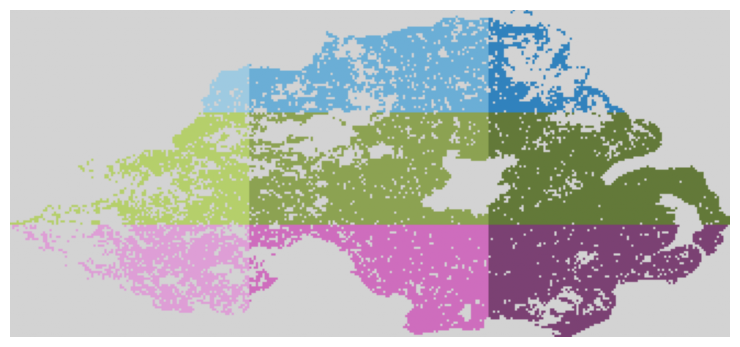

In [6]:
def create_map(ax, df, filename):
    img_grid = [[0] * len(x_locs)] * len(y_locs)
    img_grid = np.array(img_grid)
    rows = zip(
        df['location_x'],
        df['location_y']
    )
    for row in rows:
        coords = f'{row[1]}-{row[0]}'
        idx = coord_map[coords]
        xval = 0 if x_divisions[0] <= row[0] < x_divisions[1] else 1 if x_divisions[1] <= row[0] < x_divisions[2] else 2
        yval = 0 if y_divisions[1] < row[1] <= y_divisions[0] else 1 if y_divisions[2] < row[1] <= y_divisions[1] else 2
        img_grid[idx] = 3 * yval + xval + 1
    im = ax.imshow(img_grid, cmap=mpl.colors.ListedColormap(colours2), interpolation_stage='rgba')

    fig.savefig(filename, bbox_inches='tight', dpi=im.axes.figure.dpi*4)

fig, ax = plt.subplots(1, 1, figsize=(7.5, 4))
plt.axis('off')
fig.tight_layout()
create_map(ax, df, '3_colours_map.png')